<p><img alt="Colaboratory logo" height="140px" src="https://svga.unac.edu.co/svga/images/logo-new.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Analisis de datos 2</h1>

##Taller

A continuación cargaremos dos bases de datos con información referente a tarjetas de credito del mes 09 del 2017.

El archivo ESTADO_201709.txt tal que:

* ID:​ Nro. de identificación.
* Franquicia:​ A, B, C.
* Tipo Tarjeta:​ Representa el tipo de tarjeta.
* Número Tarjeta:​ Indica el número de la TC.
* Cupo Global:​ Indica el cupo de crédito que tiene la tarjeta.
* Disponible: Indica del cupo global cuanto tiene a ese corte disponible para realizar compras o avances.
* Fecha Emisión:​ Fecha en la que se compró la tarjeta.
* Fecha Ult Aumento Cupo: Fecha en la que se realizó el último aumento de cupo. Cuando está en 0 significa que nunca se ha realizado un aumento de cupo.
* Total Mes en Mora: Número de meses que ha estado en mora la TC (durante toda
la vida de la tarjeta).
*Altura de Mora: ​Indica la mora actual que tiene la TC. Viene en rango:
  ○ 0 No está en mora,
  ○ 30 está en mora hace menos de 30 días,
  ○ 60 está en mora hace menos de 60 días.
  ○ 90 está en mora hace menos de 90 días.
*Código Vendedor:​ Indica el código del vendedor que emitió la TC.
*Código Estado Tarjeta: Indica si la tarjeta está Activa o vigente (Codigo=0) y código = 1 (indica que la tarjeta está cancelada por el cliente).

Y el archivo TRANSACCION_201709.txt, tal que:

* ID:​ Nro de identificación.
* Número Tarjeta:​ Indica el número de la TC que realizó la transacción.
* Fecha de transacción​: Indica la fecha en que se realizó la transacción.
* Codigo Transacción:
  ○ AV : AVANCE
  ○ AB: ABONO
  ○ CN: COMPRA NACIONAL
  ○ CI: COMPRA INTERNAL
  ○ CM: CUOTA DE MANEJO.
* Valor Transacción:​ Indica el valor de la transacción.
* Numero Cuotas Diferidas: Indica el número de cuotas en el que el cliente desea pagar la compra.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/'
dfE = pd.read_csv(path+'ESTADO_201709.txt', delimiter="|")
dfT = pd.read_csv(path+'TRANSACCION_201709.txt', delimiter="|")

### Responda
1. Imprima cada uno de los datasets para ver sus columnas
2. Use el método merge para combinar los datasets  en el `NUMERO TARJETA' y haciendo la intersección.
3. Busque los datos faltantes y determine una estrategia adecuada par su llenado.
4. Convierta todas las fechas al fomato adecuado
5. Genere un histograma de cada columna para ver su distribución
6. Agrupe los datos por tipo de tarjeta y estado de la tarjeta. Hága un conteo ¿Existe alguna relación entre el tipo de tarjeta y la cancelación de la misma?
7. Realice un bineo del total de meses en mora partiendolos en  tres categorías: 'baja mora','media mora','alta mora'. ¿Existe alguna relación entre la mora y la cancelación de la tarjeta?.
8. Haga un gráfico de dispersión 'CODIGO VENDEDOR' vs 'CODIGO ESTADO TARJETA', ¿El vendedor de la tarjeta influencia las cancelaciones?.

Recuerde hacer un analisis exploratorio de sus datos para familiarizarse con los datos antes de comenzar el análisis.

In [15]:
#1
dfE.head()

,ID,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA
0,829,A,AZUL,768,NaN,1300000.00,20110802,0,24,0,21096,0
1,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0
2,7543,A,NaN,835,4400000.0,2213516.22,20120508,20140611,2,0,12950,0
3,4346,A,AZUL,1495,3300000.0,3220423.13,20030220,20110322,8,0,2555,0
4,568,A,AZUL,443,5250000.0,2739226.37,20081107,20170604,22,0,12832,0


In [16]:
#2
df = pd.merge(dfE,dfT, on='NUMERO TARJETA', how='inner') 
df.head()

,ID_x,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA,ID_y,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS
0,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170904,CN,17000.0,1
1,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170904,AB,98741.0,0
2,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170912,CN,112800.0,3
3,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170912,CN,112800.0,3
4,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170920,CN,93004.0,2


In [17]:
#3
#Buscar datos nulos 
df.isnull().sum()

ID_x                        0
FRANQUICIA                  0
TIPO TARJETA               91
NUMERO TARJETA              0
CUPO GLOBAL                12
DISPONIBLE                  0
FECHA DE EMISION            0
FECHA ULT AUMENTO CUPO      0
TOTAL MES EN MORA           0
ALTURA DE MORA              0
CODIGO VENDEDOR             0
CODIGO ESTADO TARJETA       0
ID_y                        0
FECHA DE TRANSACCION        0
CODIGO TRANSACCION          4
VALOR TRANSACCION           0
NUMERO CUOTAS DIFERIDAS     0
dtype: int64

In [18]:
#3
#tipo tarjeta llenarlos con datos ffill
df['TIPO TARJETA'].fillna(method='ffill',inplace=True)
#eliminar codigo transacion ya que tiene solo 4 entradas
df.dropna(subset=['CODIGO TRANSACCION'],inplace=True)
#llenar el cupo global con la media ya que es una variable cotinua
df['CUPO GLOBAL'].fillna((df['CUPO GLOBAL'].mean()),inplace=True) 
df.isnull().sum()

ID_x                       0
FRANQUICIA                 0
TIPO TARJETA               0
NUMERO TARJETA             0
CUPO GLOBAL                0
DISPONIBLE                 0
FECHA DE EMISION           0
FECHA ULT AUMENTO CUPO     0
TOTAL MES EN MORA          0
ALTURA DE MORA             0
CODIGO VENDEDOR            0
CODIGO ESTADO TARJETA      0
ID_y                       0
FECHA DE TRANSACCION       0
CODIGO TRANSACCION         0
VALOR TRANSACCION          0
NUMERO CUOTAS DIFERIDAS    0
dtype: int64

In [20]:
#4
df['FECHA DE EMISION'] = pd.to_datetime(df['FECHA DE EMISION'].astype(str),format='%Y%m%d') 
df['FECHA DE TRANSACCION'] = pd.to_datetime(df['FECHA DE TRANSACCION'].astype(str),format='%Y%m%d')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca51db6390>,
      dtype=object)

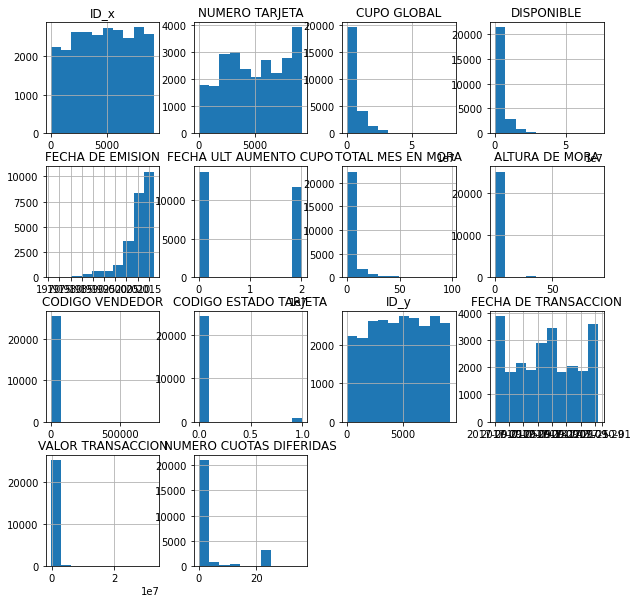

In [21]:
#5
df.hist(figsize=(10,10))

In [22]:
#6
df.groupby(['TIPO TARJETA','CODIGO ESTADO TARJETA']).agg({'CODIGO ESTADO TARJETA':['count']})



CODIGO ESTADO TARJETA
                                                          count
TIPO TARJETA        CODIGO ESTADO TARJETA                      
 C                  0                                        24
                    1                                         3
AZUL                0                                      3857
                    1                                       195
B CLASICA           0                                       381
                    1                                        24
B DORADA            0                                       470
                    1                                         3
C CLASICA           0                                      1736
                    1                                        68
C PLATINUM          0                                      1504
                    1                                        11
CLASICA C           0                                      2972
                    1                                       109
CLASICA TRADICIONAL 0                                      3838
                    1                                       217
E-CARD              0                                       143
                    1                                         9
IDEAL               0                                      1204
                    1                                        83
ORO                 0                                      1409
                    1                                        15
ORO C               0                                      1271
                    1                                        17
ORO EXITO           0                                       238
ORO TRADICIONAL     0                                      1967
                    1                                        54
PLATINUM            0                                      1052
                    1                                         6
PLATINUM C          0                                       234
VERDE               0                                      2225
                    1                                       102

In [23]:
#7
df['MES MORA DISCR'] = pd.cut(df['TOTAL MES EN MORA'],bins=3,labels=['baja mora','media mora','alta mora']) 
df.groupby(['MES MORA DISCR','CODIGO ESTADO TARJETA']).agg({'CODIGO ESTADO TARJETA':['count']})

CODIGO ESTADO TARJETA
                                                     count
MES MORA DISCR CODIGO ESTADO TARJETA                      
baja mora      0                                     24091
               1                                       909
media mora     0                                       409
               1                                         7
alta mora      0                                        25
               1                                         0

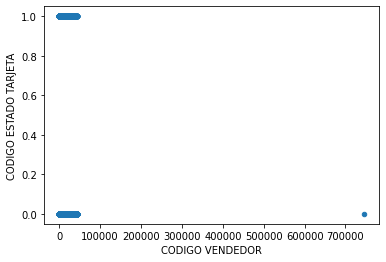

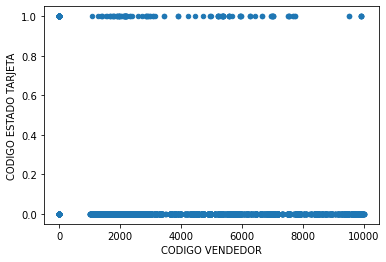

In [24]:
#8
df.plot(x='CODIGO VENDEDOR',y='CODIGO ESTADO TARJETA',kind='scatter')
#tenemos un dato atápico, aplicamos un filtro para eliminarlo
df['CODIGO VENDEDOR']=df[df['CODIGO VENDEDOR']<10000]['CODIGO VENDEDOR'] 
df.plot(x='CODIGO VENDEDOR',y='CODIGO ESTADO TARJETA',kind='scatter')

In [25]:
df.head()

,ID_x,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA,ID_y,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS,MES MORA DISCR
0,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,20170604,0,0,NaN,0,3983,2017-09-04,CN,17000.0,1,baja mora
1,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,20170604,0,0,NaN,0,3983,2017-09-04,AB,98741.0,0,baja mora
2,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,20170604,0,0,NaN,0,3983,2017-09-12,CN,112800.0,3,baja mora
3,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,20170604,0,0,NaN,0,3983,2017-09-12,CN,112800.0,3,baja mora
4,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,20170604,0,0,NaN,0,3983,2017-09-20,CN,93004.0,2,baja mora
